# Comparing all 3D models so far
> Created September 2025 <br>
> Nikhil Bisht<br>

# Definitions

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import textwrap as twp
from matplotlib import rc
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'it'})

%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

def stylize_axes(ax, title, xlabel, ylabel, xticks, yticks, xticklabels, yticklabels):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    
    ax.set_xlabel(xlabel, fontdict={'fontsize': 12})
    ax.set_ylabel(ylabel, fontdict={'fontsize': 12})
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [2]:
model_name = ['UNet Model 1',
             'UNet Model 2',
             'UNet Model 3',
             'convGRUNet Model',
             'convGRUNet DS Model 1',
             'convGRUNet DS Model 2',
             'UconvGRUNet DS Model',
             'UNetconvGRU DS Model'

]
classes = np.arange(len(model_name))

others = ['2 level UNet w/ Attention Block',
          '4 level UNet w/ Attention Block',
          '4 level UNet w/ Attention Block \n+ Persistence-forecasting',
          '2 level ConvGRU then 3 level UNet \nw/ Attention Block',
          '2 level ConvGRU then 3 level UNet \nw/ Attention Block',
          '2 level ConvGRU then 3 level UNet \nw/ Attention Block + Training Phases',
          '3 level UNet w/ Attention Block \n+ 2 level ConvGRU in latent phase + Training Phases',
          '3 level UNet w/ Attention Block \n then 2 level ConvGRU + Training Phases',
          ]
model_MSE = [0.143,
             0.0166,
             0.02,
             0.1229,
             0.0151,
             0.0014,
             0.0010,
             0.0004
]

model_params = [0.3,
                6.4,
                6.4,
                2.1,
                2.1,
                2.1,
                4.2,
                2.1
]

model_density_diff = [14652,
                      17144,
                      1969,
                      91157.9922,
                      8704,
                      9600,
                      4416,
                      2944
]
yticklabels = [0.1, 0.01, 0.001, 0.0001]

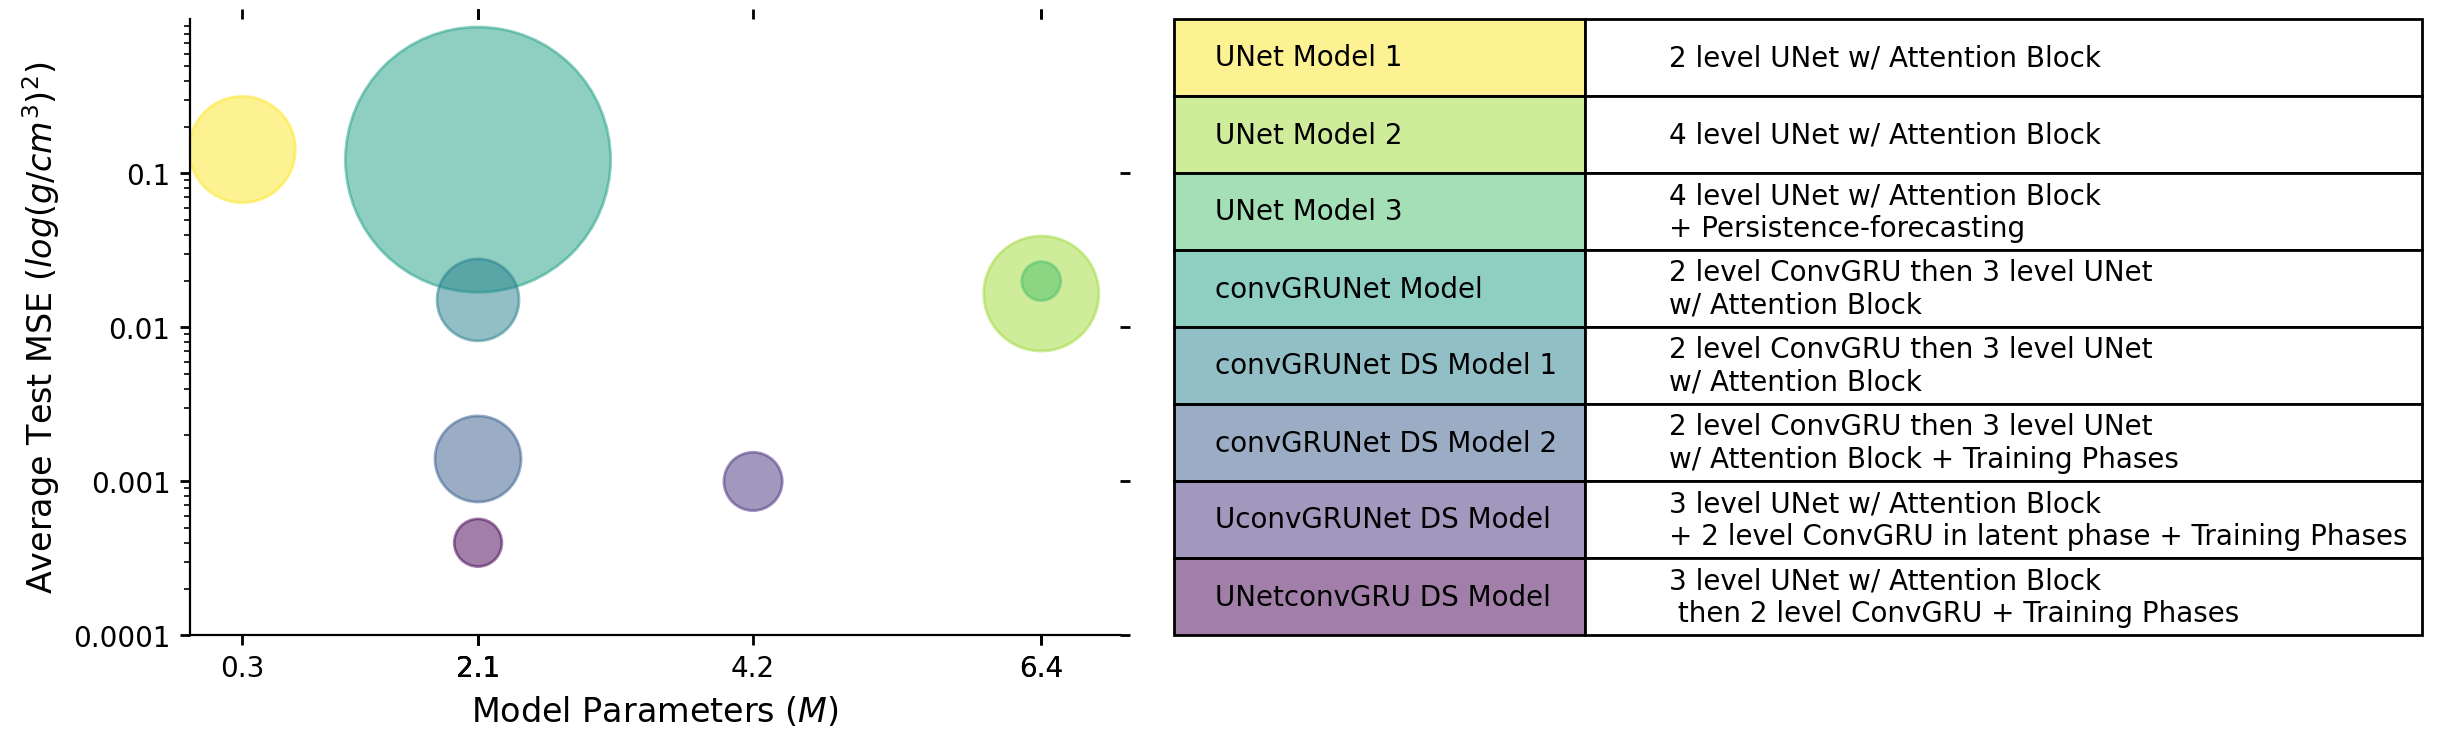

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
cmap_p = plt.get_cmap("viridis_r",len(model_name))
ax.scatter(model_params, model_MSE, marker='o',c = classes, label=classes, cmap=cmap_p, s=np.array(model_density_diff)/10, alpha=0.5)
ax.set_yscale('log')
ax.set_ylim(0.0001, 1)
ax.set_xlim(-0.1, 7)
stylize_axes(ax, 'Model Comparison', r'Model Parameters $(M)$', r'Average Test MSE $(log(g/cm^3)^2)$', model_params, yticklabels, model_params, yticklabels)

unique_classes = list(set(classes))
# Create the table
table = plt.table(cellText=[[others[i]] for i in range(len(model_name))], loc='upper right',
          rowColours=cmap_p(np.array(unique_classes), alpha = 0.5),
         rowLabels=[modelname for modelname in model_name],
         cellLoc='left',
         bbox = [1.5, 0, 0.9, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)